# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import countplot
from matplotlib.pyplot import figure, show

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.

azdias = pd.read_csv(r"C:\Users\Matt\Desktop\Udacity_Jup\project_clustering\Udacity_AZDIAS_Subset.csv", sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv(r"C:\Users\Matt\Desktop\Udacity_Jup\project_clustering\AZDIAS_Feature_Summary.csv", sep=';')                    


In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head()


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [5]:
azdias.shape


(891221, 85)

In [6]:
feat_info.shape

(85, 4)

In [7]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [8]:
azdias['FINANZ_SPARER'].max()

5

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [9]:
# Identify missing or unknown data values and convert them to NaNs.
azdias.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [10]:
#convert the missing values to NaN's 
def convert(df):
    for i, V in enumerate(df.iteritems()):
        missing_unknown = feat_info['missing_or_unknown'][i]
        column_name = V[0]
        missing_unknown = missing_unknown[1:-1].split(',')
        if missing_unknown != ['']:
            hold = []
            for x in missing_unknown:
                if x in ['X', 'XX']:
                    hold.append(x)
                else:
                    hold.append(int(x))
            df[column_name] = df[column_name].replace(hold,np.nan)
            
            
    return df           

In [11]:
azdias = convert(azdias)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [12]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
azdias.isnull().sum()


AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [13]:
# Investigate patterns in the amount of missing data in each column.
nullest = azdias.isnull().sum()
nullest.head()

AGER_TYP                685843
ALTERSKATEGORIE_GROB      2881
ANREDE_KZ                    0
CJT_GESAMTTYP             4854
FINANZ_MINIMALIST            0
dtype: int64

In [14]:
#create dataframe that has the missing values by column 
missing_value_df = pd.DataFrame({'column_name': azdias.columns,
                                 'NaNs': nullest})

In [15]:
missing_value_df.head()

,column_name,NaNs
AGER_TYP,AGER_TYP,685843
ALTERSKATEGORIE_GROB,ALTERSKATEGORIE_GROB,2881
ANREDE_KZ,ANREDE_KZ,0
CJT_GESAMTTYP,CJT_GESAMTTYP,4854
FINANZ_MINIMALIST,FINANZ_MINIMALIST,0


In [16]:
#plt.hist(missing_value_df)

In [17]:
# create dataframe that has missing value by percent 

percent_missing = azdias.isnull().sum() * 100 / (len(azdias))
missing_value_percent = pd.DataFrame({'column_name': azdias.columns,
                                 'percent_missing': percent_missing})

In [18]:
missing_value_percent.head()

,column_name,percent_missing
AGER_TYP,AGER_TYP,76.955435
ALTERSKATEGORIE_GROB,ALTERSKATEGORIE_GROB,0.323264
ANREDE_KZ,ANREDE_KZ,0.000000
CJT_GESAMTTYP,CJT_GESAMTTYP,0.544646
FINANZ_MINIMALIST,FINANZ_MINIMALIST,0.000000


In [19]:
x = missing_value_percent['column_name']
y = missing_value_percent['percent_missing']

<BarContainer object of 85 artists>

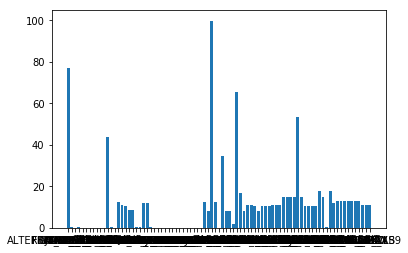

In [20]:
#look at bar chart of percent missing 
plt.bar(x, y)

In [21]:
#look at columns with over 30% missing values 
most_null = missing_value_percent[missing_value_percent.percent_missing > 30]

In [22]:
most_null

,column_name,percent_missing
AGER_TYP,AGER_TYP,76.955435
GEBURTSJAHR,GEBURTSJAHR,44.020282
TITEL_KZ,TITEL_KZ,99.757636
ALTER_HH,ALTER_HH,34.813699
KK_KUNDENTYP,KK_KUNDENTYP,65.596749
KBA05_BAUMAX,KBA05_BAUMAX,53.468668


In [23]:
some_nulls = missing_value_percent[missing_value_percent.percent_missing > 0]

In [24]:
len(some_nulls)

61

In [25]:
ten_to_twenty_nulls = missing_value_percent[(missing_value_percent['percent_missing'] > 8) & (missing_value_percent['percent_missing'] < 18)]

In [26]:
len(ten_to_twenty_nulls)

47

In [27]:
len(ten_to_twenty_nulls) / len(some_nulls)

0.7704918032786885

In [28]:
azdias.isnull().any(axis = 1).sum()

891078

In [29]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)



In [30]:
#copy of dataset before cleaning
df_clean = azdias.copy()


In [31]:
NU = df_clean.isnull().sum()
NU.mean()

98516.81176470588

In [32]:
#drop column with over 30% missing 
del df_clean['AGER_TYP']
del df_clean['GEBURTSJAHR']
del df_clean['TITEL_KZ']
del df_clean['ALTER_HH']
del df_clean['KK_KUNDENTYP']
del df_clean['KBA05_BAUMAX']

In [33]:
#test to ensure column was drop 
if 'TITEL_KZ' in df_clean.columns:
    print("Yes")
else:
    print("No")

No


#### Discussion 1.1.2: Assess Missing Data in Each Column



61 out of the 85 columns have some missing values.  Of those columns with missing values, most (77%) seem to cluster between 8% and 18%.  Six columns had more than 30% missing values; 'KK_KUNDENTYP', 'AGER_TYP', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'  These columns were removed from the dataframe.   

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [34]:
no_nulls = missing_value_percent[missing_value_percent.percent_missing == 0]

In [35]:
no_nulls

,column_name,percent_missing
ANREDE_KZ,ANREDE_KZ,0.0
FINANZ_MINIMALIST,FINANZ_MINIMALIST,0.0
FINANZ_SPARER,FINANZ_SPARER,0.0
FINANZ_VORSORGER,FINANZ_VORSORGER,0.0
FINANZ_ANLEGER,FINANZ_ANLEGER,0.0
FINANZ_UNAUFFAELLIGER,FINANZ_UNAUFFAELLIGER,0.0
FINANZ_HAUSBAUER,FINANZ_HAUSBAUER,0.0
FINANZTYP,FINANZTYP,0.0
GREEN_AVANTGARDE,GREEN_AVANTGARDE,0.0
SEMIO_SOZ,SEMIO_SOZ,0.0


In [36]:
df_clean.columns.size

79

In [37]:
# create dataframe that shows much data is missing in each row of the dataset
percent_missing_rows = df_clean.isnull().sum(axis=1) * 100 / (df_clean.columns.size)
nan_percent = pd.DataFrame({'percent_missing': percent_missing_rows})


In [38]:
nan_percent.head()

,percent_missing
0,54.430380
1,0.000000
2,0.000000
3,8.860759
4,0.000000


In [39]:
z = nan_percent.iloc[:,0]
b = nan_percent['percent_missing']


In [40]:
#function that will show percentage of rows in the dataframe with a given percent of missing variables 
def separator(n):
    lame_rows = nan_percent[nan_percent.percent_missing >= n]
    cool_rows = nan_percent[nan_percent.percent_missing < n]
    percent_lame = len(lame_rows) / len(nan_percent)
    
    return percent_lame

In [41]:
separator(5)

0.23195032433032883

In [42]:
#create column variable 'mia' that shows how many values missing in that row
df_clean['mia'] = df_clean.isnull().sum(axis=1) * 100 / (df_clean.columns.size)

In [43]:
df_clean.columns.size

80

In [44]:
df_clean['mia'].describe()

count    891221.000000
mean          7.151764
std          16.752768
min           0.000000
25%           0.000000
50%           0.000000
75%           3.797468
max          62.025316
Name: mia, dtype: float64

In [45]:
lame_rows = df_clean[df_clean.mia >= 25]

In [46]:
len(lame_rows) / len(df_clean)

0.10563485375681228

In [47]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
no_nulls = missing_value_percent[missing_value_percent.percent_missing == 0]
len(no_nulls)

24

In [48]:
full_rows = df_clean[df_clean.mia == 0]

In [49]:
len(full_rows)

623209

In [50]:
no_nulls.head(n=5)

,column_name,percent_missing
ANREDE_KZ,ANREDE_KZ,0.0
FINANZ_MINIMALIST,FINANZ_MINIMALIST,0.0
FINANZ_SPARER,FINANZ_SPARER,0.0
FINANZ_VORSORGER,FINANZ_VORSORGER,0.0
FINANZ_ANLEGER,FINANZ_ANLEGER,0.0


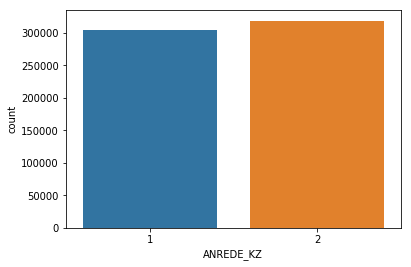

In [51]:
sns.countplot(x='ANREDE_KZ', data=full_rows)

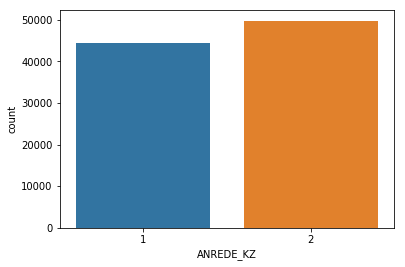

In [52]:
sns.countplot(x='ANREDE_KZ', data=lame_rows)

Text(0.5,1,'Lame Rows')

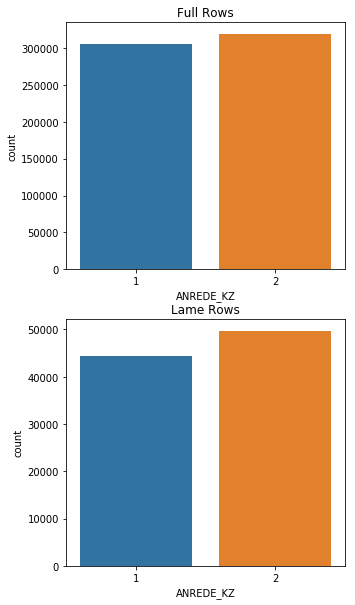

In [53]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(5,10))
sns.countplot(x='ANREDE_KZ', data=full_rows, ax = axes[0])
sns.countplot(x='ANREDE_KZ', data=lame_rows, ax = axes[1])

axes[0].set_title('Full Rows')
axes[1].set_title('Lame Rows')

In [54]:
#function to compare distributions between full rows and less than full (lame) rows

def dis_plots(vertical):
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(5,10))
    sns.countplot(x= vertical, data=full_rows, ax = axes[0])
    sns.countplot(x= vertical, data=lame_rows, ax = axes[1])
    
    axes[0].set_title('Full Rows')
    axes[1].set_title('Lame Rows')
    
    return()

()

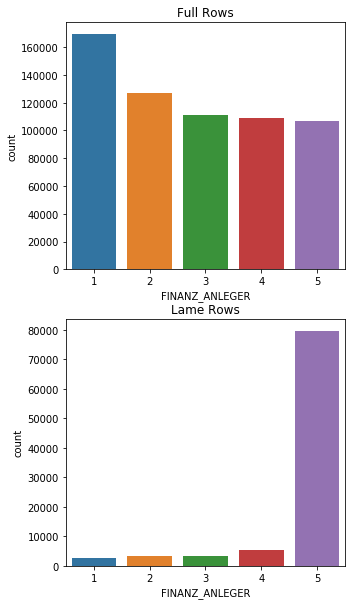

In [55]:
dis_plots('FINANZ_ANLEGER')

In [56]:
#continue analysis with a dataframe that has less than the threshold of 25% missing values in row 
#set df_clean to rows with less than 25% missing values
df_clean = df_clean[df_clean.mia < 25]


#### Discussion 1.1.3: Assess Missing Data in Each Row



We set a threshold of 25% for missing values in a row to seperate.  This is one standard deviation above the mean value for missing value percents for the rows.  About 10% of the dataframe is represented in this set (lame_rows).  

Of the columns I compared with no missing values, most had distributions that were very different between rows high percent of  missing values (25% or more) versus rows with little or no missing values (less than 25%).   

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [57]:
# How many features are there of each data type?
feat_info.head()


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [58]:
feat_info['type'].unique()

array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'],
      dtype=object)

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [59]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical = feat_info[feat_info.type == 'categorical'] 
categorical.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]


In [60]:
cat_attributes = categorical.attribute.get_values()

In [61]:
cat_attributes = cat_attributes.tolist()

In [62]:
cat_attributes

['AGER_TYP',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'TITEL_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'KK_KUNDENTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [63]:
len(cat_attributes)

21

In [64]:
df_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,mia
1,1.0,2,5.0,1,5,2,5,4,5,1,...,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0.000000
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0.000000
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,8.860759
4,3.0,1,5.0,4,3,4,1,3,2,5,...,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,0.000000
5,1.0,2,2.0,3,1,5,2,2,5,2,...,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,0.000000


In [65]:
df_clean_cat = df_clean[df_clean.columns.intersection(cat_attributes)]

In [66]:
df_clean_cat.head()

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,GEBAEUDETYP,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015
1,2,5.0,1,10.0,0,5.0,3.0,2.0,1.0,1.0,3.0,1.0,2.0,5,8.0,W,8,8A
2,2,3.0,1,10.0,1,1.0,1.0,3.0,2.0,1.0,2.0,0.0,1.0,5,1.0,W,4,4C
3,2,2.0,6,1.0,0,NaN,NaN,9.0,4.0,1.0,1.0,0.0,1.0,3,1.0,W,2,2A
4,1,5.0,5,5.0,0,10.0,5.0,3.0,2.0,1.0,2.0,0.0,2.0,4,1.0,W,6,6B
5,2,2.0,2,1.0,0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,2.0,4,1.0,W,8,8C


In [67]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical_numeric = df_clean_cat.select_dtypes(include=numerics) 

In [68]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_non_numeric = df_clean_cat.select_dtypes(exclude=numerics)

In [69]:
categorical_non_numeric.head()

,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015
1,W,8,8A
2,W,4,4C
3,W,2,2A
4,W,6,6B
5,W,8,8C


In [70]:
categorical_numeric.head()

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,GEBAEUDETYP
1,2,5.0,1,10.0,0,5.0,3.0,2.0,1.0,1.0,3.0,1.0,2.0,5,8.0
2,2,3.0,1,10.0,1,1.0,1.0,3.0,2.0,1.0,2.0,0.0,1.0,5,1.0
3,2,2.0,6,1.0,0,NaN,NaN,9.0,4.0,1.0,1.0,0.0,1.0,3,1.0
4,1,5.0,5,5.0,0,10.0,5.0,3.0,2.0,1.0,2.0,0.0,2.0,4,1.0
5,2,2.0,2,1.0,0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,2.0,4,1.0


In [71]:
categorical_non_numeric['OST_WEST_KZ'].unique()

array(['W', 'O'], dtype=object)

In [72]:
categorical_non_numeric['OST_WEST_KZ'].nunique()

2

In [73]:
categorical_non_numeric['CAMEO_DEUG_2015'].unique()

array(['8', '4', '2', '6', '1', '9', '5', '7', nan, '3'], dtype=object)

In [74]:
categorical_non_numeric['CAMEO_DEU_2015'].unique()

array(['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C',
       '8B', '7A', '5D', '9E', nan, '9B', '1B', '3D', '4E', '4B', '3C',
       '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D',
       '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F',
       '1C'], dtype=object)

In [75]:
categorical_numeric['CJT_GESAMTTYP'].unique()

array([ 5.,  3.,  2.,  4.,  1.,  6., nan])

In [76]:
categorical_numeric.nunique() > 2


ANREDE_KZ           False
CJT_GESAMTTYP        True
FINANZTYP            True
GFK_URLAUBERTYP      True
GREEN_AVANTGARDE    False
LP_FAMILIE_FEIN      True
LP_FAMILIE_GROB      True
LP_STATUS_FEIN       True
LP_STATUS_GROB       True
NATIONALITAET_KZ     True
SHOPPER_TYP          True
SOHO_KZ             False
VERS_TYP            False
ZABEOTYP             True
GEBAEUDETYP          True
dtype: bool

In [77]:
categorical_numeric.nunique() == 2

ANREDE_KZ            True
CJT_GESAMTTYP       False
FINANZTYP           False
GFK_URLAUBERTYP     False
GREEN_AVANTGARDE     True
LP_FAMILIE_FEIN     False
LP_FAMILIE_GROB     False
LP_STATUS_FEIN      False
LP_STATUS_GROB      False
NATIONALITAET_KZ    False
SHOPPER_TYP         False
SOHO_KZ              True
VERS_TYP             True
ZABEOTYP            False
GEBAEUDETYP         False
dtype: bool

In [78]:
df_clean['SOHO_KZ'].unique()

array([1., 0.])

In [79]:
# Re-encode categorical variable(s) to be kept in the analysis.

In [80]:
#use dummy variables to encode east / west german building location

df_clean['east_west'] = df_clean.OST_WEST_KZ.map({'O':0, 'W':1, 7:np.NaN})

In [81]:
#check new column was created
df_clean.head(3)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,mia,east_west
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0.000000,1.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0.000000,1.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,8.860759,1.0


In [82]:
#drop 'OST_WEST_KZ'
df_clean = df_clean.drop(['OST_WEST_KZ'], axis = 1 )

In [83]:
df_clean['east_west'].unique()

array([1., 0.])

In [84]:
#Drop CAMEO_DEUG_2015 CAMEO_DEU_2015
df_clean = df_clean.drop(['CAMEO_DEUG_2015', 'CAMEO_DEU_2015'], axis = 1 )

In [85]:
#create function to ensure columns were drop
def drop_hot(col):
    if col in df_clean.columns:
        print("Yes")
    else:
        print("No")

In [86]:
drop_hot('OST_WEST_KZ')

No


In [87]:
drop_hot('CAMEO_DEU_2015')

No


In [88]:
# create list of numeric columns with more than one variable that we decided to drop 
drop_chosen = ['FINANZTYP', 'GFK_URLAUBERTYP','LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 
            'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP']

In [89]:
len(drop_chosen)

10

In [90]:
#Drop numeric classification columns with more than one variable (see explanation below for reasoning)
df_clean = df_clean.drop(drop_chosen, axis = 1 )

In [91]:
#test some columns to ensure they were drop with drop_hot, if it was drop, it returns No
drop_hot('SHOPPER_TYP')

No


In [92]:
#use get_dummies to encode binary variables for CJT_GESAMTTYP 
buy_dummy = pd.get_dummies(df_clean.CJT_GESAMTTYP, prefix = 'buying_channel')
buy_dummy.head()

,buying_channel_1.0,buying_channel_2.0,buying_channel_3.0,buying_channel_4.0,buying_channel_5.0,buying_channel_6.0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0
5,0,1,0,0,0,0


In [93]:
#concat to df_clean
df_clean = pd.concat([df_clean, buy_dummy], axis = 1)

In [94]:
#test to make sure columns concat
drop_hot('buying_channel_3.0')

Yes


In [95]:
df_clean = df_clean.drop(['CJT_GESAMTTYP'], axis = 1 )

In [96]:
drop_hot('CJT_GESAMTTYP')

No


In [97]:
#use get_dummies to encode binary variables for LP_FAMILIE_FEIN 
family_dummy = pd.get_dummies(df_clean.LP_FAMILIE_FEIN, prefix = 'family_type')
family_dummy.head()

,family_type_1.0,family_type_2.0,family_type_3.0,family_type_4.0,family_type_5.0,family_type_6.0,family_type_7.0,family_type_8.0,family_type_9.0,family_type_10.0,family_type_11.0
1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0


In [98]:
#concat to df_clean
df_clean = pd.concat([df_clean, family_dummy], axis = 1)

In [99]:
#test to make sure columns concat
drop_hot('family_type_4.0')

Yes


In [100]:
df_clean = df_clean.drop(['LP_FAMILIE_FEIN'], axis = 1 )

In [101]:
drop_hot('LP_FAMILIE_FEIN')

No


#### Discussion 1.2.1: Re-Encode Categorical Features


Created Dummy variables for east/west germany.  

We drop the two non-numeric categorical columns CAMEO_DEUG_2015	and CAMEO_DEU_2015 to make the analysis more straight forward as these columns classifications are very broad and subjective.  

For the numeric classification columns with more than two variables we decided to encode CJT_GESAMTTYP and LP_FAMILIE_FEIN.  

CJT_GESAMTTYP shows a person's buying channels and therefore might be very informative to our analysis considering we are examining a person's preference to respond to a specific advertising channel.  We are thinking that certain advertising channels and subsequent buying channels would be related.  

LP_FAMILIE_FEIN shows a person's family type.  This could be very relative to the customers receptiveness to certain type of advertising.  It also would be more informative than just the amount of people in a person's family.  

We decided to drop all the other numeric classification columns with more than two variables because they were not informative or too broad and subjective.  Or like in LP_STATUS_GROB, we drop because information was more relative and specific in other columns in the dataframe.  Or like in NATIONALITAET_KZ the informational gain would probably not be great given our objectives and considering that the classification probably has many inaccuracies.  

We encoded CJT_GESAMTTYP and LP_FAMILIE_FEIN using get_dummies.  

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [102]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
df_clean['CAMEO_INTL_2015'].unique()

array(['51', '24', '12', '43', '54', '22', '14', '13', '15', '33', '41',
       '34', '55', nan, '25', '23', '31', '52', '35', '45', '44', '32'],
      dtype=object)

In [103]:
#enginerring two new variables 
df_clean['wealth_stage'] = df_clean['CAMEO_INTL_2015'].astype(str)
df_clean['wealth'] = df_clean['wealth_stage'].str[0:1]
df_clean['life_stage'] = df_clean['wealth_stage'].str[1:2]

In [104]:
#check split
df_clean['life_stage'].unique()

array(['1', '4', '2', '3', '5', 'a'], dtype=object)

In [105]:
#check values
df_clean['CAMEO_INTL_2015'][1]

'51'

In [106]:
df_clean['life_stage'][1]

'1'

In [107]:
#after split - put back NaN values and replace XX with nan
df_clean[(df_clean.life_stage == 'n')] = np.NaN
df_clean[(df_clean.life_stage == 'X')] = np.NaN
df_clean[(df_clean.life_stage == 'a')] = np.NaN

In [108]:
df_clean['life_stage'].unique()

array(['1', '4', '2', '3', '5', nan], dtype=object)

In [109]:
#change life_stage column values to numeric
s = df_clean['life_stage']
temp = pd.to_numeric(s)

In [110]:
temp.unique()

array([ 1.,  4.,  2.,  3.,  5., nan])

In [111]:
#create new column
df_clean['integer_lifestage'] = temp.values

In [112]:
#look at values
df_clean['integer_lifestage'].unique()

array([ 1.,  4.,  2.,  3.,  5., nan])

In [113]:
#after split - put back NaN values and replace XX with nan
df_clean[(df_clean.wealth == 'n')] = np.NaN
df_clean[(df_clean.wealth == 'X')] = np.NaN
df_clean[(df_clean.wealth == 'a')] = np.NaN

In [114]:
#change wealth column values to numeric
k = df_clean['wealth']
ktemp = pd.to_numeric(k)

In [115]:
#create new column
df_clean['integer_wealth'] = ktemp.values

In [116]:
#look at values
df_clean['integer_wealth'].unique()

array([ 5.,  2.,  1.,  4.,  3., nan])

In [117]:
#drop wealth
df_clean = df_clean.drop('wealth', axis=1)

In [118]:
drop_hot('wealth')

No


In [119]:
#drop life stage
df_clean = df_clean.drop('life_stage', axis=1)

In [120]:
drop_hot('life_stage')

No


In [121]:
df_clean = df_clean.drop('wealth_stage', axis=1)

In [122]:
drop_hot('wealth_stage')

No


In [123]:
df_clean = df_clean.drop('CAMEO_INTL_2015', axis=1)

In [124]:
drop_hot('CAMEO_INTL_2015')

No


In [125]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
df_clean['PRAEGENDE_JUGENDJAHRE'].unique()

array([14., 15.,  8.,  3., 10., 11.,  5.,  9., nan,  6.,  4.,  2.,  1.,
       12., 13.,  7.])

In [126]:
#create dictionary to map to generation
generation_dict = {1: 40, 2: 40, 3: 50, 4:50, 5:60, 6:60, 7:60, 8: 70, 9:70, 10:80, 11:80, 12:80, 12:80, 14:90, 15:90}

In [127]:
df_clean['generation']= df_clean['PRAEGENDE_JUGENDJAHRE'].map(generation_dict)

In [128]:
df_clean['generation'].unique()

array([90., 70., 50., 80., 60., nan, 40.])

In [129]:
#create dictionary to map to movement, 0 = avantgarde, 1 = mainstream
avant_main_dict = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0 }

In [130]:
df_clean['youth']= df_clean['PRAEGENDE_JUGENDJAHRE'].map(avant_main_dict)

In [131]:
df_clean['generation'].unique()

array([90., 70., 50., 80., 60., nan, 40.])

In [132]:
df_clean['youth'].unique()

array([ 1.,  0., nan])

In [133]:
df_clean = df_clean.drop('PRAEGENDE_JUGENDJAHRE', axis=1)

In [134]:
drop_hot('PRAEGENDE_JUGENDJAHRE')

No


In [135]:
#find mixed columns

mixed = feat_info[feat_info.type == 'mixed'] 


mixed

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [136]:
#for 'WOHNLAGE' there just seems to be one value that represents a mixed category
df_clean['WOHNLAGE'].unique()

array([ 4.,  2.,  7.,  3.,  5.,  1., nan,  8.,  0.])

In [137]:
#change 'WOHNLAGE' - number 7 and 8 both represent rural neighborhood, but number 8 also represents new building
#since this is the only number that represents building type - replace 8 with 7
df_clean[(df_clean.WOHNLAGE == 8)] = 7

In [138]:
#test to see change went through 
df_clean['WOHNLAGE'].unique()

array([ 4.,  2.,  7.,  3.,  5.,  1., nan,  0.])

In [139]:
#replace 5 with nan values in PLZ8_BAUMAX
df_clean[(df_clean.PLZ8_BAUMAX == 5)] = np.NaN

In [140]:
#test to see change went through 
df_clean['PLZ8_BAUMAX'].unique()

array([ 1.,  2., nan,  4.,  3.,  7.])

#### Discussion 1.2.2: Engineer Mixed-Type Features


For CAMEO_INTL_2015, I split the data and put them in two seperate columns, 'integer_wealth' and 'integer_stage'  by turning the column values into a string and splitting the string putting them in their respective columns.  For PRAEGENDE_JUGENDJAHRE I also created two columns 'generation' and 'youth' and split the data into their respective columns.  I made a dictionary for both variables and then used the dictionary to map the variables to their respective columns.  

For LP_LEBENSPHASE_FEIN	and LP_LEBENSPHASE_GROB, we decided to drop these columns as it would be more straight forward and the information contained is also better reflected in other columns.  

For column 'WOHNLAGE' there was one value (8) that represented a mixed classification.  We replaced the 8s with 7s to represent just the one classification.  

  

Similar to KBA05_BAUMAX, PLZ8_BAUMAX had one number (5) that represented a different classification.  We replaced both 5 with nan.


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [141]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [142]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

#drop mia
df_clean = df_clean.drop('mia', axis=1)


In [143]:
drop_hot('mia')

No


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [144]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    
    
    # remove selected columns and rows, ...

    
    # select, re-encode, and engineer column values.

    
    # Return the cleaned dataframe.
    
    df = convert(df)
    
    df['east_west'] = df.OST_WEST_KZ.map({'O':0, 'W':1, 7:np.NaN})
    
    chan_dummy = pd.get_dummies(df.CJT_GESAMTTYP, prefix = 'buying_channel')
    df = pd.concat([df, chan_dummy], axis = 1)
    
    fam_dummy = pd.get_dummies(df.LP_FAMILIE_FEIN, prefix = 'family_type')
    df = pd.concat([df, fam_dummy], axis = 1)
    
   
    
    #enginerring two new variables 
    df['wealth_stage'] = df['CAMEO_INTL_2015'].astype(str)
    df['wealth'] = df['wealth_stage'].str[0:1]
    df['life_stage'] = df['wealth_stage'].str[1:2]
    
    df[(df.life_stage == 'n')] = np.NaN
    df[(df.life_stage == 'X')] = np.NaN
    df[(df.life_stage == 'a')] = np.NaN
    
    z = df['life_stage']
    temp = pd.to_numeric(z)
    
    #create new column
    df['integer_lifestage'] = temp.values
    
    #after split - put back NaN values and replace XX with nan
    df[(df.wealth == 'n')] = np.NaN
    df[(df.wealth == 'X')] = np.NaN
    df[(df.wealth == 'a')] = np.NaN
    
    #change wealth column values to numeric
    m = df['wealth']
    ktemp = pd.to_numeric(m)
    
    #create new column
    df['integer_wealth'] = ktemp.values
    
    generation_dict = {1: 40, 2: 40, 3: 50, 4:50, 5:60, 6:60, 7:60, 8: 70, 9:70, 10:80, 11:80, 12:80, 12:80, 14:90, 15:90}
    
    df['generation']= df['PRAEGENDE_JUGENDJAHRE'].map(generation_dict)
    
    avant_main_dict = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0 }
    df['youth']= df['PRAEGENDE_JUGENDJAHRE'].map(avant_main_dict)
    
   
    
    #change 'WOHNLAGE' - number 7 and 8 both represent rural neighborhood, but number 8 also represents new building
    #since this is the only number that represents building type - replace 8 with 7
    df[(df.WOHNLAGE == 8)] = 7
    
    #replace 5 with nan values in PLZ8_BAUMAX
    df[(df.PLZ8_BAUMAX == 5)] = np.NaN
    
    drop_chosen = ['FINANZTYP', 'GFK_URLAUBERTYP','LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 
                   'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP',
                   'AGER_TYP', 'GEBURTSJAHR','TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX',
                  'OST_WEST_KZ','CAMEO_DEUG_2015', 'CAMEO_DEU_2015',
                  'CJT_GESAMTTYP','LP_FAMILIE_FEIN',
                  'wealth', 'life_stage', 'CAMEO_INTL_2015','wealth_stage',
                  'PRAEGENDE_JUGENDJAHRE']
    
    df = df.drop(drop_chosen, axis = 1 )
    
    return df
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [145]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

#df_clean.isnull().sum()
len(df_clean)

797077

In [146]:
NU = df_clean.isnull().sum()
NU.mean()

110622.28571428571

In [147]:
df_clean.isnull().sum()

ALTERSKATEGORIE_GROB     105160
ANREDE_KZ                102827
FINANZ_MINIMALIST        102827
FINANZ_SPARER            102827
FINANZ_VORSORGER         102827
FINANZ_ANLEGER           102827
FINANZ_UNAUFFAELLIGER    102827
FINANZ_HAUSBAUER         102827
GREEN_AVANTGARDE         102827
HEALTH_TYP               132136
LP_LEBENSPHASE_FEIN      143789
LP_LEBENSPHASE_GROB      141563
RETOURTYP_BK_S           106776
SEMIO_SOZ                102827
SEMIO_FAM                102827
SEMIO_REL                102827
SEMIO_MAT                102827
SEMIO_VERT               102827
SEMIO_LUST               102827
SEMIO_ERL                102827
SEMIO_KULT               102827
SEMIO_RAT                102827
SEMIO_KRIT               102827
SEMIO_DOM                102827
SEMIO_KAEM               102827
SEMIO_PFLICHT            102827
SEMIO_TRADV              102827
SOHO_KZ                  102827
ANZ_PERSONEN             102827
ANZ_TITEL                102827
                          ...  
PLZ8_ANT

In [148]:
df_clean.isnull().any(axis = 1).sum()

246698

In [149]:
df_clean['FINANZ_SPARER'].value_counts(dropna=False)

 1.0    215079
 2.0    130198
 5.0    115353
 3.0    114842
NaN     102827
 4.0    101735
 7.0     17043
Name: FINANZ_SPARER, dtype: int64

In [150]:
#copy of dataset after cleaning but before tranforming
df_tran = df_clean.copy()

In [151]:
from sklearn.preprocessing import Imputer

In [152]:
#drop all rows where all the values are 0
df_drop = df_tran.dropna(how='all')


In [153]:
#look at shape
df_drop.shape

(694250, 84)

In [154]:
#use imputer to use means to fill in nan values
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(df_drop))
imputed_DF.columns = df_drop.columns
imputed_DF.index = df_drop.index

In [155]:
#change dataframe name
new_df = imputed_DF

In [156]:
#test that there is no nan
new_df.isnull().any(axis = 1).sum()

0

In [157]:
new_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,family_type_6.0,family_type_7.0,family_type_8.0,family_type_9.0,family_type_10.0,family_type_11.0,integer_lifestage,integer_wealth,generation,youth
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,90.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,90.0,0.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,70.0,1.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,70.0,1.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,50.0,1.0


In [158]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler



In [159]:
#variable to standard scaler
ss = StandardScaler()

In [160]:
#create new scaled dataframe
df_scaled = pd.DataFrame(ss.fit_transform(new_df),columns = new_df.columns)

In [161]:
df_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,family_type_6.0,family_type_7.0,family_type_8.0,family_type_9.0,family_type_10.0,family_type_11.0,integer_lifestage,integer_wealth,generation,youth
0,-0.887233,0.348885,-1.507954,1.389006,-1.080544,1.288689,0.813670,1.237668,-0.355143,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,-1.351416,1.127025,1.070095,-0.164524
1,-0.014349,0.348885,-1.507954,0.766160,-1.768423,-0.597787,0.162893,1.237668,0.531820,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,0.578352,-0.783754,1.070095,-0.322971
2,0.422093,0.348885,0.507008,-0.479533,0.983091,-0.597787,-1.138660,-0.748017,-0.355143,-0.251600,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,-0.708160,-1.420680,0.007099,-0.164524
3,-0.014349,-0.670922,0.507008,0.143313,0.295213,-1.226612,0.162893,-0.748017,-0.355143,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,0.591678,-0.214679,-0.064904,0.490099,0.007099,-0.164524
4,-0.887233,0.348885,-0.164646,-1.102379,0.983091,-0.597787,-0.487883,1.237668,-0.355143,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,0.578352,1.127025,-1.055896,-0.164524


### Discussion 2.1: Apply Feature Scaling



We decided to drop any rows that had missing rows across all the columns.  Then we filled in the remaining nan's with mean of the column.  We then used the Standard Scaler to scale the dataframe.   


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [162]:
# Apply PCA to the data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [163]:
#create function that performs pca 

def apply_pca(n_columns, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_columns)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [164]:
#function to plot variance explained by pca
def scree_plot(pca):

    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    


In [165]:
pca, X_pca = apply_pca(23, df_scaled)

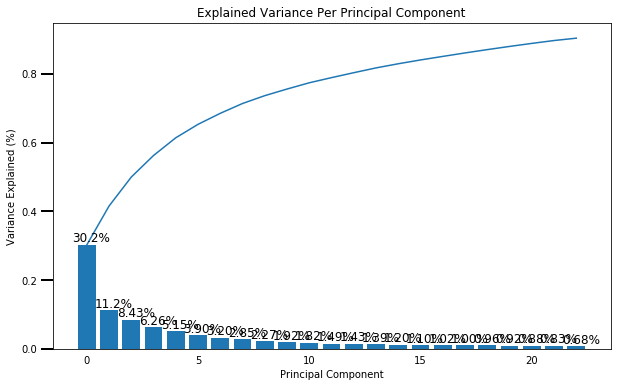

In [166]:
# Investigate the variance accounted for by each principal component.
scree_plot(pca)

In [167]:
X_pca.shape

(694250, 23)

In [168]:
pca.explained_variance_ratio_.sum()

0.9034893461382302

In [169]:

#def num_components(sum_total_percent_of_variability_wanted):
#    xrange = range(15, 80)
#    for x in xrange:
#        apply_pca(x, df_scaled)
#        num = x
#        var_sum = pca.explained_variance_ratio_.sum()
#        if var_sum > sum_total_percent_of_variability_wanted:
#            print(num)
#            break
#        else: 
#            continue


In [170]:
#num_components(.83)

In [171]:
# Re-apply PCA to the data while selecting for number of components to retain.



### Discussion 2.2: Perform Dimensionality Reduction



We were looking to have a total of 90% of the variance explained by pca.  With some trial and error we found that level (90.36% with 23 principal components.  So we reduced our features by 73% and still retained over 90% of the variability.  


### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [172]:
#function that creates a dataframe outlining the total and individual variability in each principal components by feature name
def pca_results(full_dataset, pca):

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions


	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)


In [173]:
var = pca_results(df_scaled, pca)

In [174]:
var.head()

,Explained Variance,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,...,family_type_6.0,family_type_7.0,family_type_8.0,family_type_9.0,family_type_10.0,family_type_11.0,integer_lifestage,integer_wealth,generation,youth
Dimension 1,0.3024,0.0527,0.1728,0.0739,0.0896,0.0685,0.0865,0.0945,0.0804,0.1833,...,0.1967,0.1956,0.1953,0.1964,0.1865,0.1927,0.0789,0.0763,-0.1017,0.0291
Dimension 2,0.1129,-0.0201,-0.0225,0.0081,0.0138,-0.0383,0.0042,0.0508,-0.0770,-0.0148,...,-0.0171,-0.0159,-0.0176,-0.0192,-0.0199,-0.0193,-0.0081,-0.0413,0.0386,0.0043
Dimension 3,0.0843,0.1470,0.0691,0.1743,-0.2643,0.2573,-0.1916,-0.2128,0.0108,0.0291,...,0.0088,0.0083,0.0092,0.0105,0.0137,0.0116,0.0730,-0.0521,-0.2180,0.0057
Dimension 4,0.0627,-0.0397,0.1583,-0.2608,0.1194,-0.1037,0.1334,0.0730,0.1664,-0.0498,...,-0.0130,-0.0144,-0.0170,-0.0138,-0.0302,-0.0249,-0.0779,0.1305,0.0637,0.0587
Dimension 5,0.0515,0.0451,-0.0910,-0.0165,-0.0725,0.1003,-0.1546,-0.1096,0.1364,-0.0108,...,0.0013,-0.0027,-0.0030,0.0024,-0.0152,-0.0096,-0.0670,0.1799,-0.0971,0.0038


In [175]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.


In [176]:
#created function that takes the dimension/component to interpret, how many features to view, dataframe and pca 
# it returns a list sorted by the absolute weight of each column in the component 
def interpret(rank_of_component, num_features, full_dataset, pca):
    var = pca_results(full_dataset, pca)
    var = var.abs()
    feature_weight = var.iloc[rank_of_component - 1].sort_values(ascending=False)
    feature_weight.drop(['Explained Variance'], inplace = True)
    
    return feature_weight.head(n = num_features)
    
    

In [177]:
interpret(1, 7, df_scaled, pca)

MIN_GEBAEUDEJAHR    0.1974
ANZ_TITEL           0.1971
family_type_3.0     0.1970
SOHO_KZ             0.1968
family_type_6.0     0.1967
family_type_9.0     0.1964
family_type_4.0     0.1963
Name: Dimension 1, dtype: float64

In [178]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
interpret(2, 7, df_scaled, pca)


PLZ8_GBZ      0.2732
PLZ8_HHZ      0.2715
PLZ8_ANTG1    0.2710
PLZ8_ANTG2    0.2670
PLZ8_ANTG4    0.2663
KBA05_GBZ     0.2656
MOBI_REGIO    0.2648
Name: Dimension 2, dtype: float64

In [179]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
interpret(3, 7, df_scaled, pca)


SEMIO_REL           0.3060
SEMIO_ERL           0.2795
SEMIO_PFLICHT       0.2714
SEMIO_KULT          0.2696
FINANZ_SPARER       0.2643
FINANZ_VORSORGER    0.2573
SEMIO_TRADV         0.2550
Name: Dimension 3, dtype: float64

### Discussion 2.3: Interpret Principal Components



Within my function, I took the absolute value of the variability to see the largest impact on the component (positive or negative) when the series is sorted.  
The first component seemed to use the building type and family structure members as its largest features. The second component used the various measures of the family houses in the PLZ8 region as its largest features.  The third component seemed to use mostly the personality typology as its features with the largest impact.  

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [180]:
# Over a number of different cluster counts...


    # run k-means clustering on the data and...
    
    
    # compute the average within-cluster distances.
    
    

In [181]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.



In [182]:
from sklearn.cluster import KMeans

In [183]:
# Try instantiating a model with 4 centers
kmeans_4 = KMeans(n_clusters=4)

# fit the model to your data using the fit method
model_4 = kmeans_4.fit(X_pca)

# Finally predict the labels on the same data to show the category that point belongs to
labels_4 = model_4.predict(X_pca)




In [184]:
#use helper function from Udacity course material to obtain cluster score

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

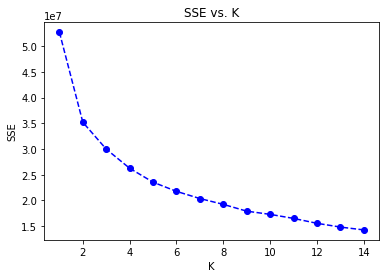

In [185]:
#Use Udacity course material for loop to plot scores and find the elbow 

scores = []
centers = list(range(1,15))

for center in centers:
    scores.append(get_kmeans_score(X_pca, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [186]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# instantiating the model with the 6 clusters as found in the elbow of the previous plot
kmeans_10 = KMeans(n_clusters=10)

# fit the model to your data using the fit method
model_10 = kmeans_10.fit(X_pca)

# Finally predict the labels on the same data to show the category that point belongs to
labels_10 = model_10.predict(X_pca)


### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

We segmented the population into 10 clusters as being the "elbow" of the previous plot 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [187]:
# Load in the customer demographics data.

customers = pd.read_csv(r"C:\Users\Matt\Desktop\Udacity_Jup\project_clustering\Udacity_CUSTOMERS_Subset.csv", sep=';')

In [188]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [189]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
old_customers = clean_data(customers)


In [190]:
old_customers.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,family_type_6.0,family_type_7.0,family_type_8.0,family_type_9.0,family_type_10.0,family_type_11.0,integer_lifestage,integer_wealth,generation,youth
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,50.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,50.0,0.0
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,40.0,1.0
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,70.0,1.0


In [191]:
old_customers = old_customers.dropna(how='all')

In [192]:
old_customers.shape

(130958, 84)

In [193]:
#use imputer to use means to fill in nan values
put_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
imputed_cust = pd.DataFrame(put_NaN.fit_transform(old_customers))
imputed_cust.columns = old_customers.columns
imputed_cust.index = old_customers.index

In [194]:
#change dataframe name
customers_df = imputed_cust

In [195]:
#test that there is no nan
customers_df.isnull().any(axis = 1).sum()

0

In [196]:
customers_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,family_type_6.0,family_type_7.0,family_type_8.0,family_type_9.0,family_type_10.0,family_type_11.0,integer_lifestage,integer_wealth,generation,youth
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,50.0,0.0
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,50.0,0.0
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,40.0,1.0
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,70.0,1.0
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,50.0,0.0


In [197]:
#variable to standard scaler
std_scale = StandardScaler()

In [198]:
#create new scaled dataframe
customers_scaled = pd.DataFrame(std_scale.fit_transform(customers_df),columns = customers_df.columns)

In [199]:
df_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,family_type_6.0,family_type_7.0,family_type_8.0,family_type_9.0,family_type_10.0,family_type_11.0,integer_lifestage,integer_wealth,generation,youth
0,-0.887233,0.348885,-1.507954,1.389006,-1.080544,1.288689,0.813670,1.237668,-0.355143,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,-1.351416,1.127025,1.070095,-0.164524
1,-0.014349,0.348885,-1.507954,0.766160,-1.768423,-0.597787,0.162893,1.237668,0.531820,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,0.578352,-0.783754,1.070095,-0.322971
2,0.422093,0.348885,0.507008,-0.479533,0.983091,-0.597787,-1.138660,-0.748017,-0.355143,-0.251600,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,-0.708160,-1.420680,0.007099,-0.164524
3,-0.014349,-0.670922,0.507008,0.143313,0.295213,-1.226612,0.162893,-0.748017,-0.355143,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,0.591678,-0.214679,-0.064904,0.490099,0.007099,-0.164524
4,-0.887233,0.348885,-0.164646,-1.102379,0.983091,-0.597787,-0.487883,1.237668,-0.355143,-0.106835,...,-0.167951,-0.179924,-0.183244,-0.169962,-0.301119,-0.214679,0.578352,1.127025,-1.055896,-0.164524


In [200]:
#appy general population PCA tranformation on the customer dataframe
cust_transform = pca.transform(customers_scaled)
cust_transform = pd.DataFrame(cust_transform)
cust_transform.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.164790,-0.368601,0.652010,-3.658421,0.566456,-1.187192,-0.613751,-0.948225,-0.551847,-0.210936,...,-0.807138,-0.347326,-2.086239,-0.431124,-0.197733,0.474463,-0.226539,0.048955,1.114425,0.470710
1,-0.670249,-0.774505,2.958449,2.925784,-0.055801,0.554789,-0.751834,-0.083917,-0.671540,0.443476,...,-0.660103,0.551734,0.366424,-0.407384,0.214278,-0.343262,-2.086328,-0.743743,-0.018840,-0.468722
2,-0.564870,-0.749541,-0.081158,-2.321629,-0.065201,-1.318786,4.079401,-2.955518,1.191033,1.630112,...,2.080660,-0.629911,-1.037947,-0.481496,1.821109,0.114296,-0.291577,0.094888,-0.354736,-2.518712
3,-0.533034,-0.247957,-3.672393,1.457851,0.010369,0.006026,0.717327,-0.114095,-1.280960,-0.390197,...,0.541689,0.345920,-0.154332,-1.193449,0.005023,-0.326343,-0.967900,-0.326839,0.923065,-0.454002
4,-0.478290,-0.454826,-0.050583,-1.070627,0.888057,0.293488,-0.626884,0.721392,0.509777,0.017668,...,0.422202,2.756667,0.776247,0.591057,-0.239166,0.940093,-0.155667,0.771311,-0.590674,-0.038930


In [201]:
#apply k-means clusters from the fitted population
cust_clusters = model_10.predict(cust_transform)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [202]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.



In [203]:
#put customer clusters into a value_counts series
cust_clusters = pd.Series(cust_clusters)
customer_values = cust_clusters.value_counts().sort_index()
customer_values = pd.Series(customer_values)
customer_values

0      540
1    63020
2     2208
3     2350
4    11475
5    28685
6     5830
7    11726
8     1918
9     3206
dtype: int64

In [204]:
#put population clusters into a value_counts series
labels_10 = pd.Series(labels_10)
pop_values = labels_10.value_counts().sort_index()
pop_values = pd.Series(pop_values)
pop_values

0      3831
1    186939
2     17043
3     18297
4    112571
5    189450
6     34780
7     94766
8     17657
9     18916
dtype: int64

In [205]:
#create DF showing both clusters 
cluster_df = pd.concat([customer_values,pop_values], axis=1).reset_index()
cluster_df.columns = ['cluster', 'customers', 'population']
cluster_df

,cluster,customers,population
0,0,540,3831
1,1,63020,186939
2,2,2208,17043
3,3,2350,18297
4,4,11475,112571
5,5,28685,189450
6,6,5830,34780
7,7,11726,94766
8,8,1918,17657
9,9,3206,18916


Text(0.5,1,'Population')

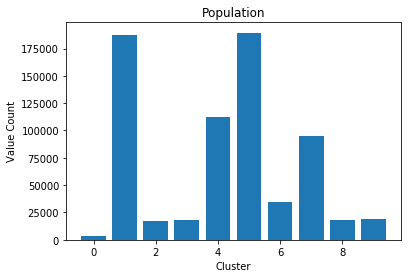

In [206]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

#bar chart of the population distribution
plt.bar(cluster_df['cluster'], cluster_df['population'])
plt.ylabel("Value Count")
plt.xlabel("Cluster")
plt.title("Population")



Text(0.5,1,'Customers')

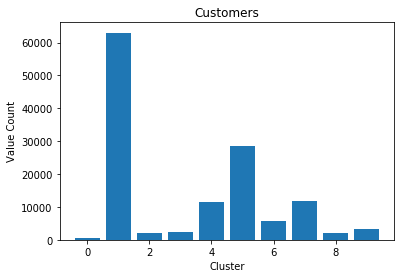

In [207]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

#bar chart of the customer distribtuion 

plt.bar(cluster_df['cluster'], cluster_df['customers'])
plt.ylabel("Value Count")
plt.xlabel("Cluster")
plt.title("Customers")

In [208]:
#number of rows seperated out from data due to missing rows
rows_removed = len(lame_rows)
rows_removed

94144

In [209]:
#create column variable 'percent population' that shows percentage of values in each cluster of the population
cluster_df['percent population'] = cluster_df['population'] / cluster_df['population'].sum()

In [210]:
cluster_df


,cluster,customers,population,percent population
0,0,540,3831,0.005518
1,1,63020,186939,0.269268
2,2,2208,17043,0.024549
3,3,2350,18297,0.026355
4,4,11475,112571,0.162148
5,5,28685,189450,0.272884
6,6,5830,34780,0.050097
7,7,11726,94766,0.136501
8,8,1918,17657,0.025433
9,9,3206,18916,0.027247


In [211]:
#create column variable 'percent customers' that shows percentage of values in each cluster for the customer base
cluster_df['percent customers'] = cluster_df['customers'] / cluster_df['customers'].sum()

In [212]:
cluster_df

,cluster,customers,population,percent population,percent customers
0,0,540,3831,0.005518,0.004123
1,1,63020,186939,0.269268,0.481223
2,2,2208,17043,0.024549,0.016860
3,3,2350,18297,0.026355,0.017945
4,4,11475,112571,0.162148,0.087624
5,5,28685,189450,0.272884,0.219040
6,6,5830,34780,0.050097,0.044518
7,7,11726,94766,0.136501,0.089540
8,8,1918,17657,0.025433,0.014646
9,9,3206,18916,0.027247,0.024481


In [213]:
#create column that shows the differential between percent customers and percent population in order to see which 
#cluster is most over - represented by the customer base 
cluster_df['contrast_representation'] = cluster_df['percent customers'] - cluster_df['percent population']

In [214]:
cluster_df

,cluster,customers,population,percent population,percent customers,contrast_representation
0,0,540,3831,0.005518,0.004123,-0.001395
1,1,63020,186939,0.269268,0.481223,0.211955
2,2,2208,17043,0.024549,0.016860,-0.007688
3,3,2350,18297,0.026355,0.017945,-0.008410
4,4,11475,112571,0.162148,0.087624,-0.074524
5,5,28685,189450,0.272884,0.219040,-0.053845
6,6,5830,34780,0.050097,0.044518,-0.005579
7,7,11726,94766,0.136501,0.089540,-0.046961
8,8,1918,17657,0.025433,0.014646,-0.010787
9,9,3206,18916,0.027247,0.024481,-0.002766


In [215]:
#Transform cluster 1 as it has an over-representation of customers compared to the general population
c1 = model_10.cluster_centers_[1]
c1 = pd.Series(c1)
c1.index = c1.index +1
c1.sort_values(ascending=False)

5     1.054273
3     0.641372
6     0.149089
12    0.085943
21    0.065287
14    0.055113
20    0.031970
23    0.026893
16    0.022786
18    0.018776
19    0.015541
15    0.013984
22   -0.002396
11   -0.038584
13   -0.040013
8    -0.049497
7    -0.074677
17   -0.121201
10   -0.171870
9    -0.181160
2    -0.719417
1    -1.113397
4    -2.070313
dtype: float64

In [216]:
#transfet cluster 1 to original features
c1original = std_scale.inverse_transform(pca.inverse_transform(c1))
c1original = pd.Series(c1original).round(1)




In [217]:
#sort feature columns by weights 
c1original.sort_values(ascending=False)

36    2001.2
51     683.6
82      52.9
10      26.5
11       9.1
32       8.9
17       6.6
18       6.1
12       5.6
31       5.5
13       5.2
2        5.0
4        5.0
60       4.9
45       4.9
19       4.5
20       4.5
14       4.5
43       4.4
33       4.2
46       3.9
0        3.9
48       3.8
42       3.7
37       3.7
44       3.7
50       3.7
58       3.6
57       3.5
80       3.5
       ...  
39       1.0
1        0.9
62       0.9
5        0.8
3        0.8
8        0.6
34       0.6
83       0.3
55       0.3
64       0.3
70       0.2
63       0.2
78       0.2
69       0.2
79       0.1
65       0.1
66       0.1
67       0.1
74      -0.0
77      -0.0
76      -0.0
75      -0.0
27      -0.0
73      -0.0
72      -0.0
71      -0.0
29      -0.0
68      -0.0
40       0.0
41      -0.1
Length: 84, dtype: float64

In [218]:
df_scaled.columns[36]

'MIN_GEBAEUDEJAHR'

In [219]:
df_scaled.columns[51]

'KBA13_ANZAHL_PKW'

In [220]:
df_scaled.columns[82]

'generation'

In [221]:
c1original.sort_values(ascending=True)

41      -0.1
40       0.0
68      -0.0
29      -0.0
71      -0.0
72      -0.0
73      -0.0
27      -0.0
75      -0.0
76      -0.0
77      -0.0
74      -0.0
67       0.1
66       0.1
65       0.1
79       0.1
69       0.2
78       0.2
63       0.2
70       0.2
64       0.3
55       0.3
83       0.3
34       0.6
8        0.6
3        0.8
5        0.8
62       0.9
1        0.9
39       1.0
       ...  
80       3.5
57       3.5
58       3.6
50       3.7
44       3.7
37       3.7
42       3.7
48       3.8
0        3.9
46       3.9
33       4.2
43       4.4
14       4.5
20       4.5
19       4.5
45       4.9
60       4.9
4        5.0
2        5.0
13       5.2
31       5.5
12       5.6
18       6.1
17       6.6
32       8.9
11       9.1
10      26.5
82      52.9
51     683.6
36    2001.2
Length: 84, dtype: float64

In [222]:
df_scaled.columns[41]

'KBA05_ANTG4'

### Discussion 3.3: Compare Customer Data to Demographics Data


Cluster 1 represents a large proportion of the customer base 48% with only a 28 percent representation of the general population.  This is an over-representation of customers compared to the general population.  

Cluster 7 represents a small proportion of the customer base but a relatively larger proportion of the general population.  Cluster 7 is an under-representation of customers compared to the general population.  


The highest weighted features in this dataset are MIN_GEBAEUDEJAHR, which represents the first year building was mentioned in the database, 'KBA13_ANZAHL_PKW' - which represents the number of cars in the PLZ8 region and the 'generation' of the customer with higher generation denoting younger persons.  Therefore, it seems that the company is popular with people who live in newer buildings in an area with many cars that tend to be younger.  

The smallest negative weighted features are represented by 'KBA05_ANTG4' which represents high shares of 10+ homes in the microcell.  Therefore it would seem that older homes in a micro-cell with a high share of 10+ family homes along with older generation of people tend to not favor the company.    







> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.

In [223]:
c6 = model_10.cluster_centers_[6]

In [224]:
c6

array([-0.89716084,  0.4459591 , -0.06518555, -1.01101609, -1.78429304,
       -0.20220363,  0.3255543 , -0.62315021,  1.54756692,  4.11600958,
        0.40074378, -0.98254857, -0.44680484, -0.06219004, -0.00679684,
        0.24240486,  0.07626839,  0.07162219, -0.30812119, -0.16179205,
       -0.06078399,  0.02786078, -0.10214339])

In [225]:
len(labels_10)

694250

In [226]:
#labels for each row, each row's cluster
labels_10.head(n=20)

0     4
1     5
2     6
3     1
4     4
5     4
6     7
7     1
8     5
9     5
10    9
11    9
12    3
13    4
14    6
15    1
16    3
17    7
18    7
19    3
dtype: int32

In [227]:
labels_10.unique()

array([4, 5, 6, 1, 7, 9, 3, 2, 0, 8], dtype=int64)